In [2]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("../All_Data/220304拿放水壺(坐著)/手2022-03-04 114937.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

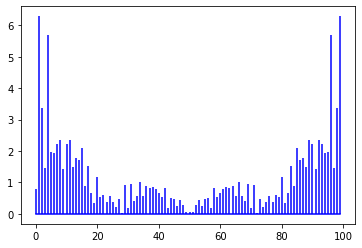

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


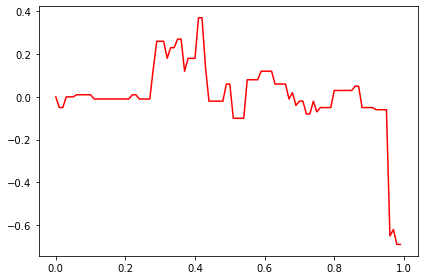

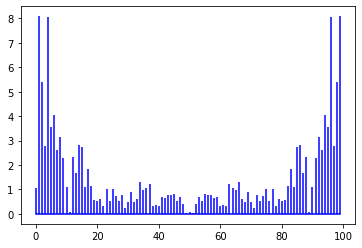

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


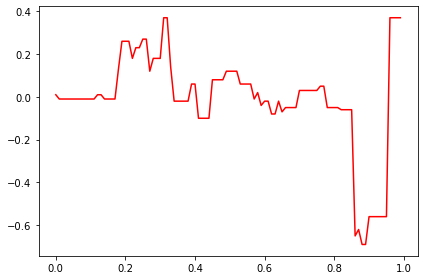

In [3]:
for i in range (0,20,10):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=(data[start+i:start+i+sr,1])
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [4]:
print(Spectrum)

[array([0.78      , 6.28799779, 3.35869545, 1.46280197, 5.70437699,
       1.9798034 , 1.93679873, 2.21963066, 2.35106981, 1.43810935,
       2.22129404, 2.33657592, 1.49794366, 1.769342  , 1.70361007,
       2.10063833, 0.89155571, 1.52553798, 0.67208793, 0.34871144,
       1.17048155, 0.54177882, 0.60164861, 0.36578336, 0.57660932,
       0.37576588, 0.20675545, 0.47101119, 0.02183571, 0.9317405 ,
       0.19507121, 0.93911017, 0.41524748, 0.56745406, 1.00161193,
       0.58488021, 0.90071609, 0.83511237, 0.86364391, 0.78324889,
       0.65709431, 0.52781817, 0.81134768, 0.18162067, 0.50377257,
       0.46304672, 0.24569265, 0.44659811, 0.2736517 , 0.06470179,
       0.06      , 0.06470179, 0.2736517 , 0.44659811, 0.24569265,
       0.46304672, 0.50377257, 0.18162067, 0.81134768, 0.52781817,
       0.65709431, 0.78324889, 0.86364391, 0.83511237, 0.90071609,
       0.58488021, 1.00161193, 0.56745406, 0.41524748, 0.93911017,
       0.19507121, 0.9317405 , 0.02183571, 0.47101119, 0.2067

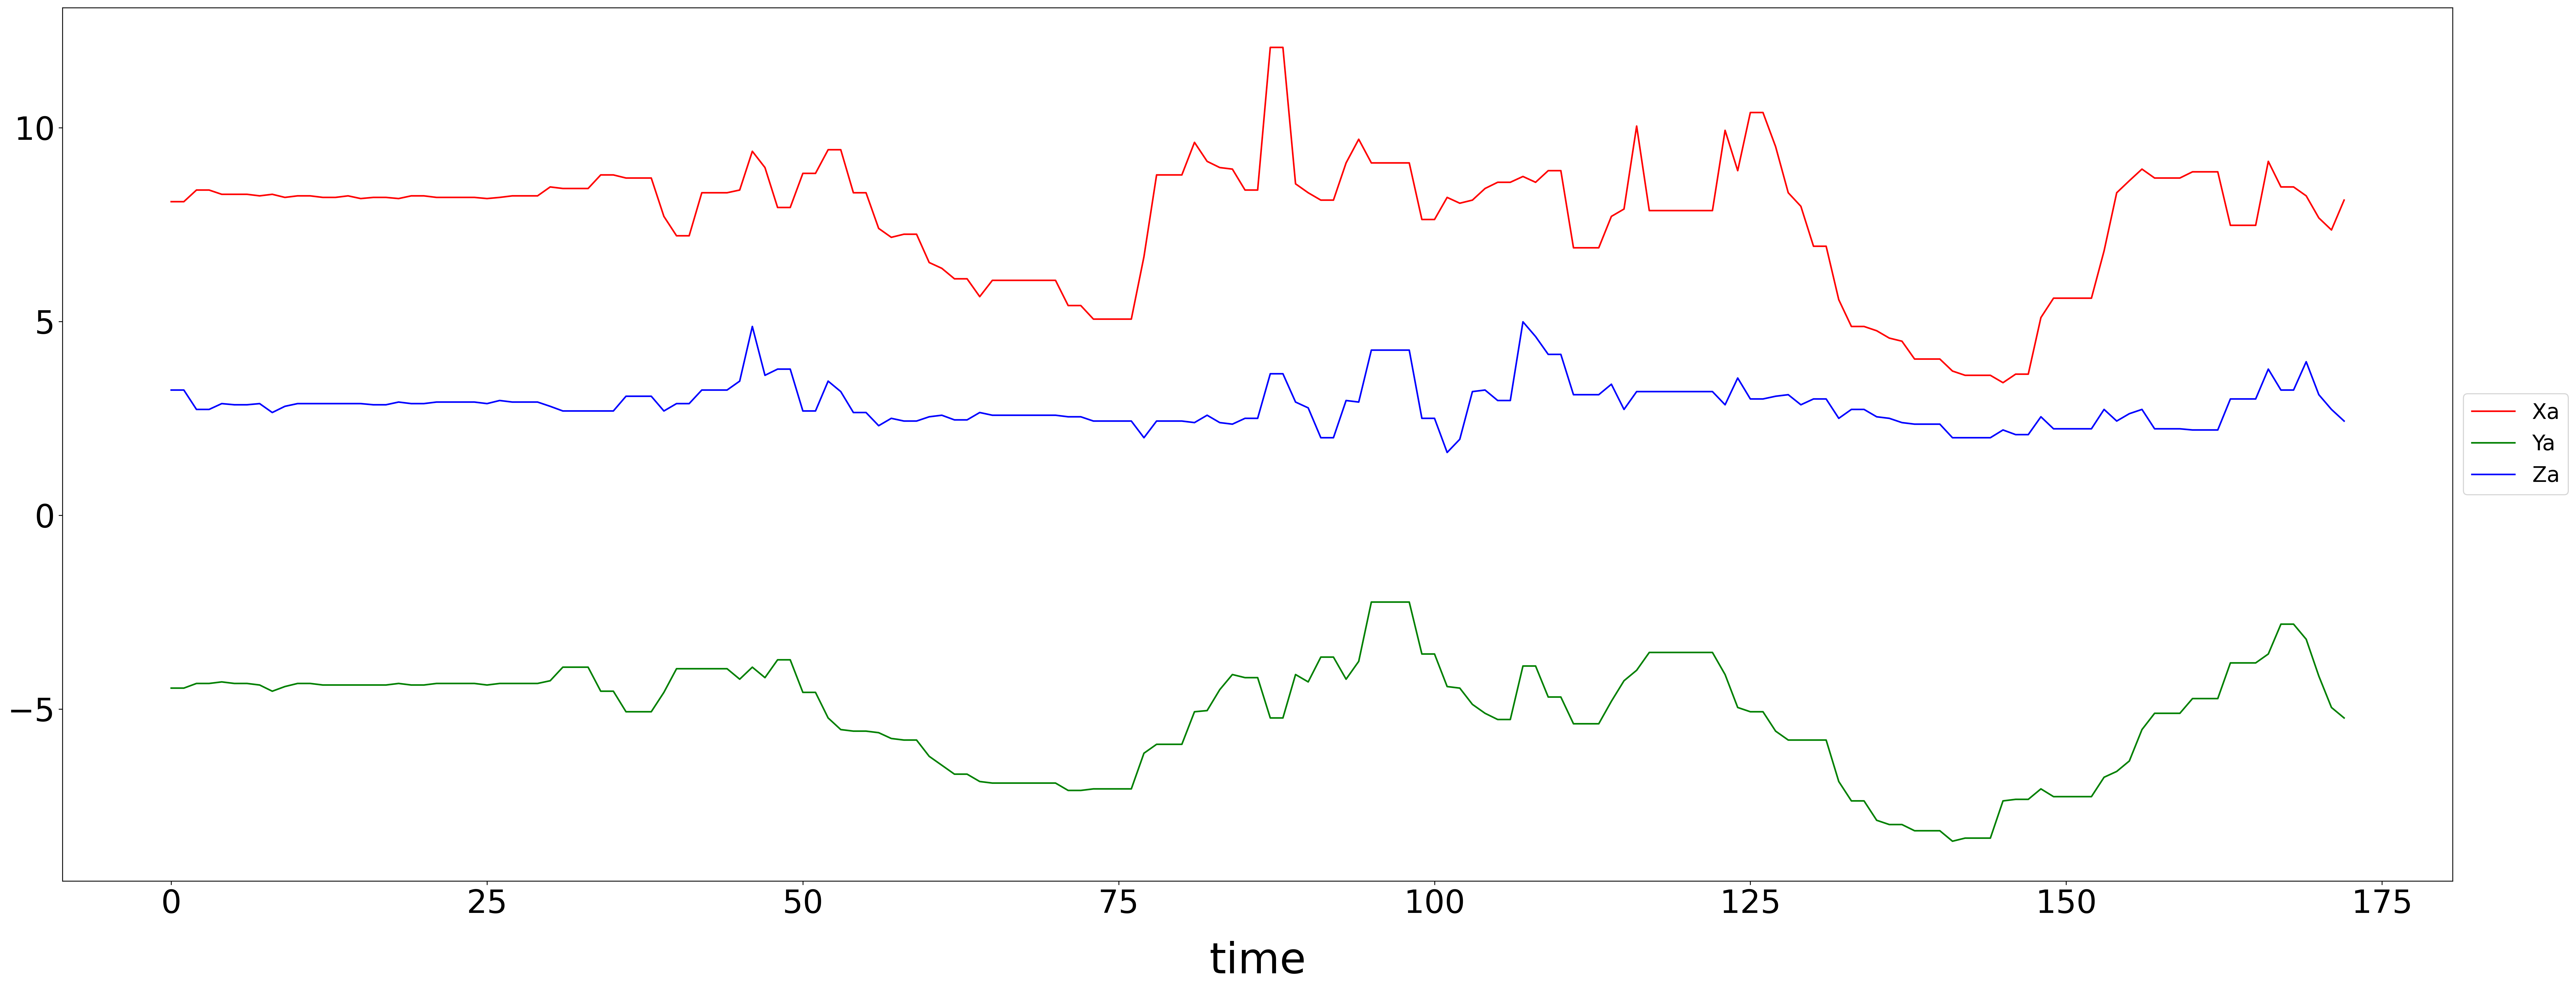

In [5]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,7], color = 'r', label = "Xa")
plt.plot(length, data[:,8], color = 'g', label = "Ya")
plt.plot(length, data[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21434/3517152436.py:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=173).
  plt.specgram(data[:,1],Fs=1,cmap='plasma')


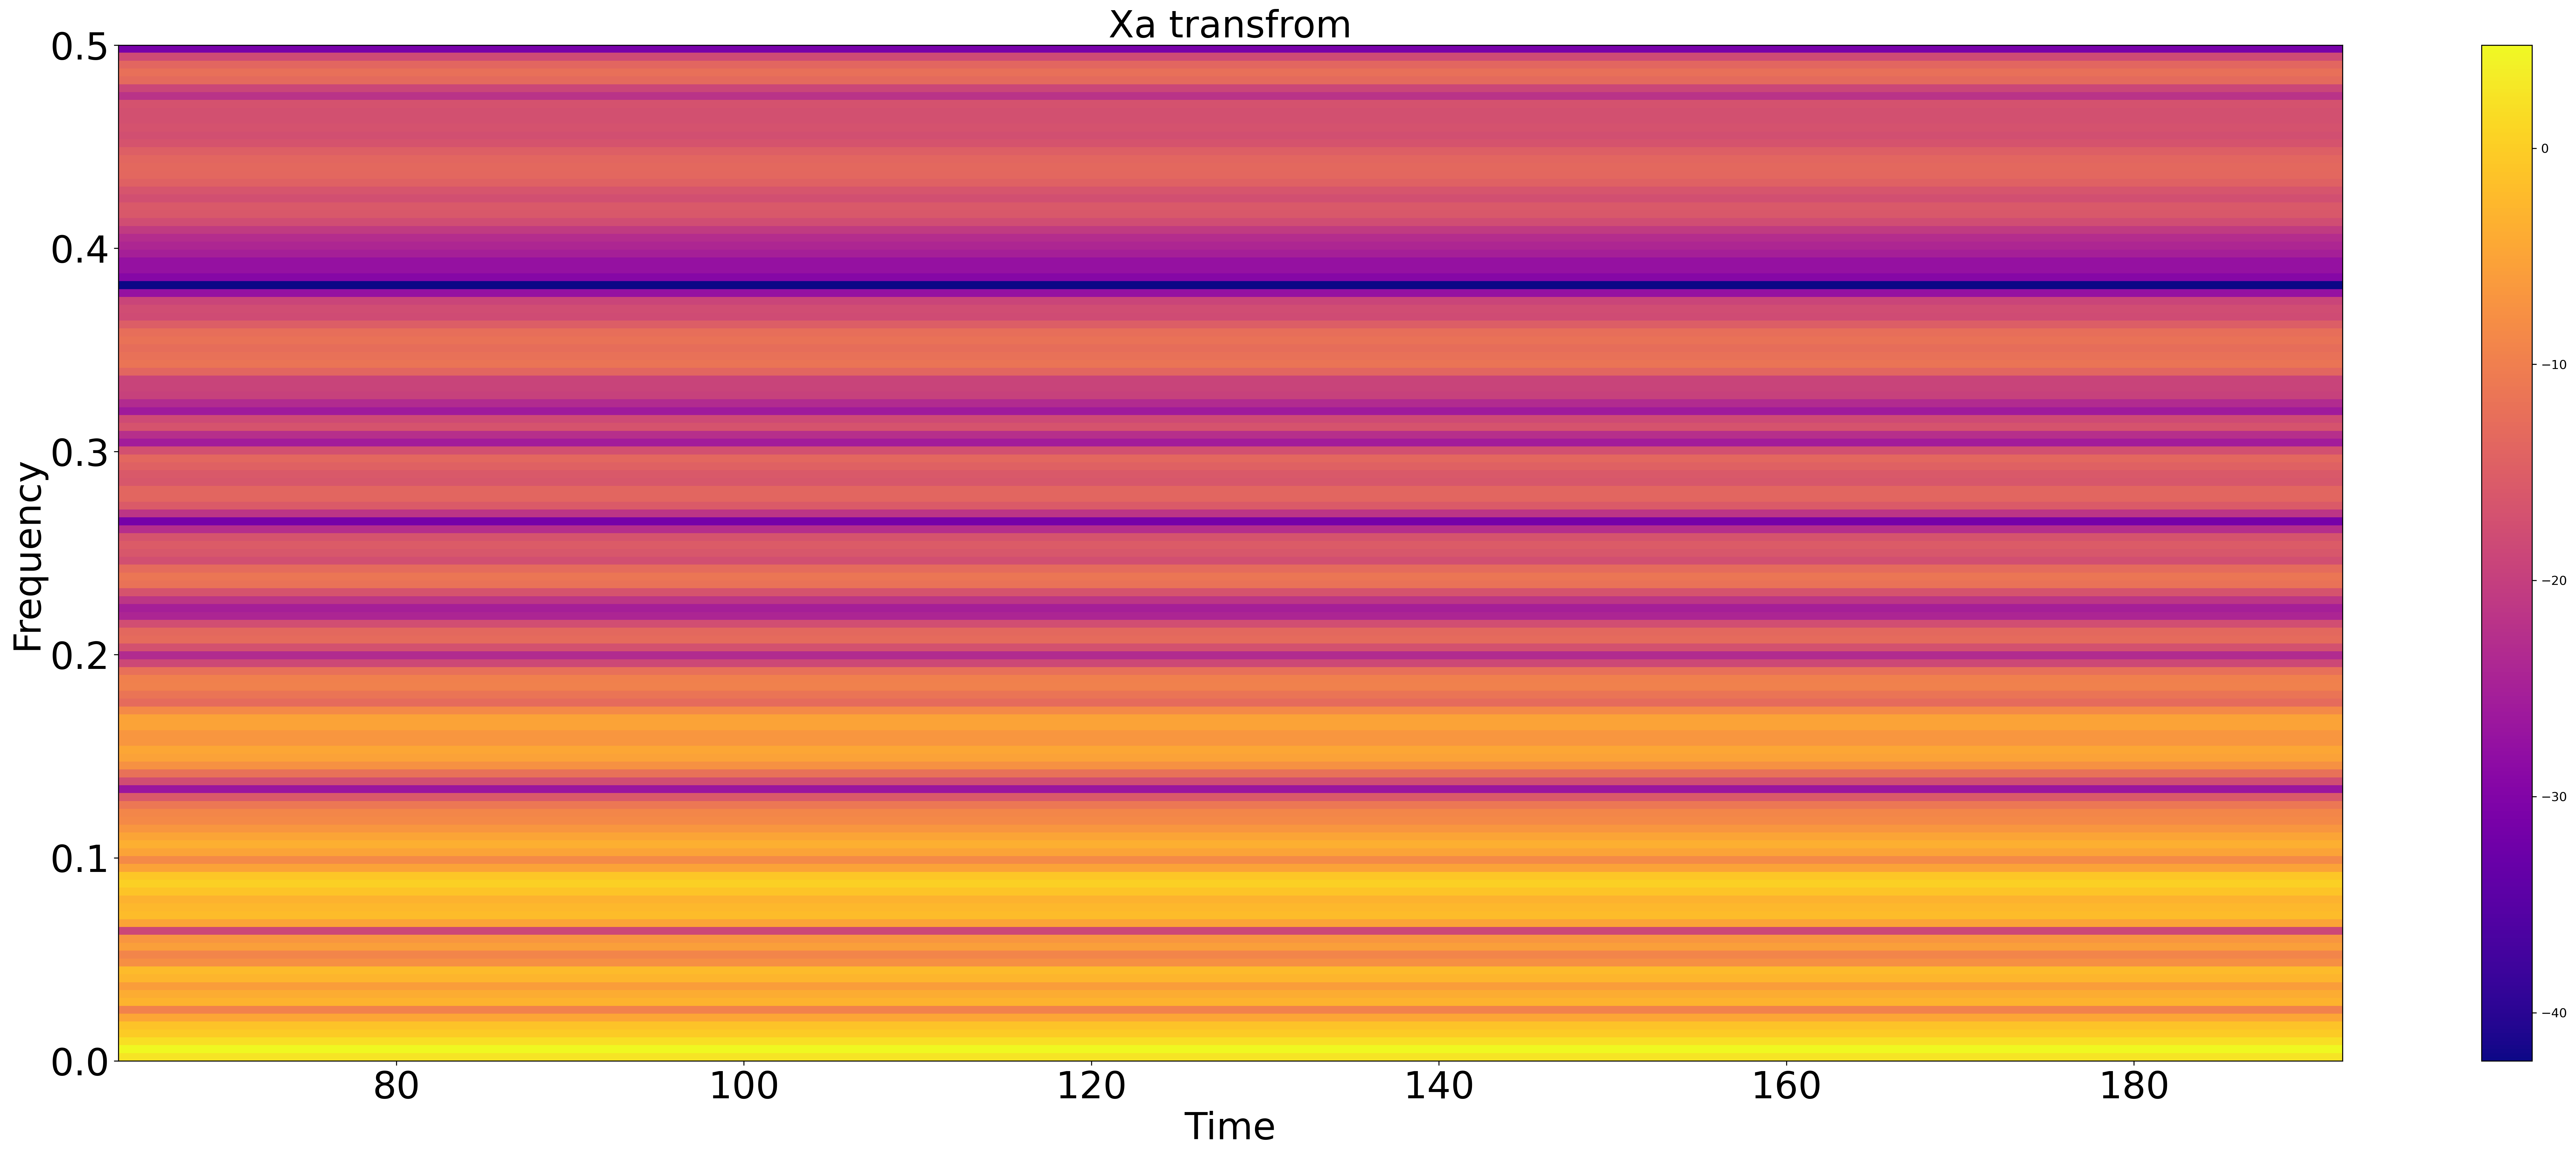

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21434/3517152436.py:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=173).
  plt.specgram(data[:,2])


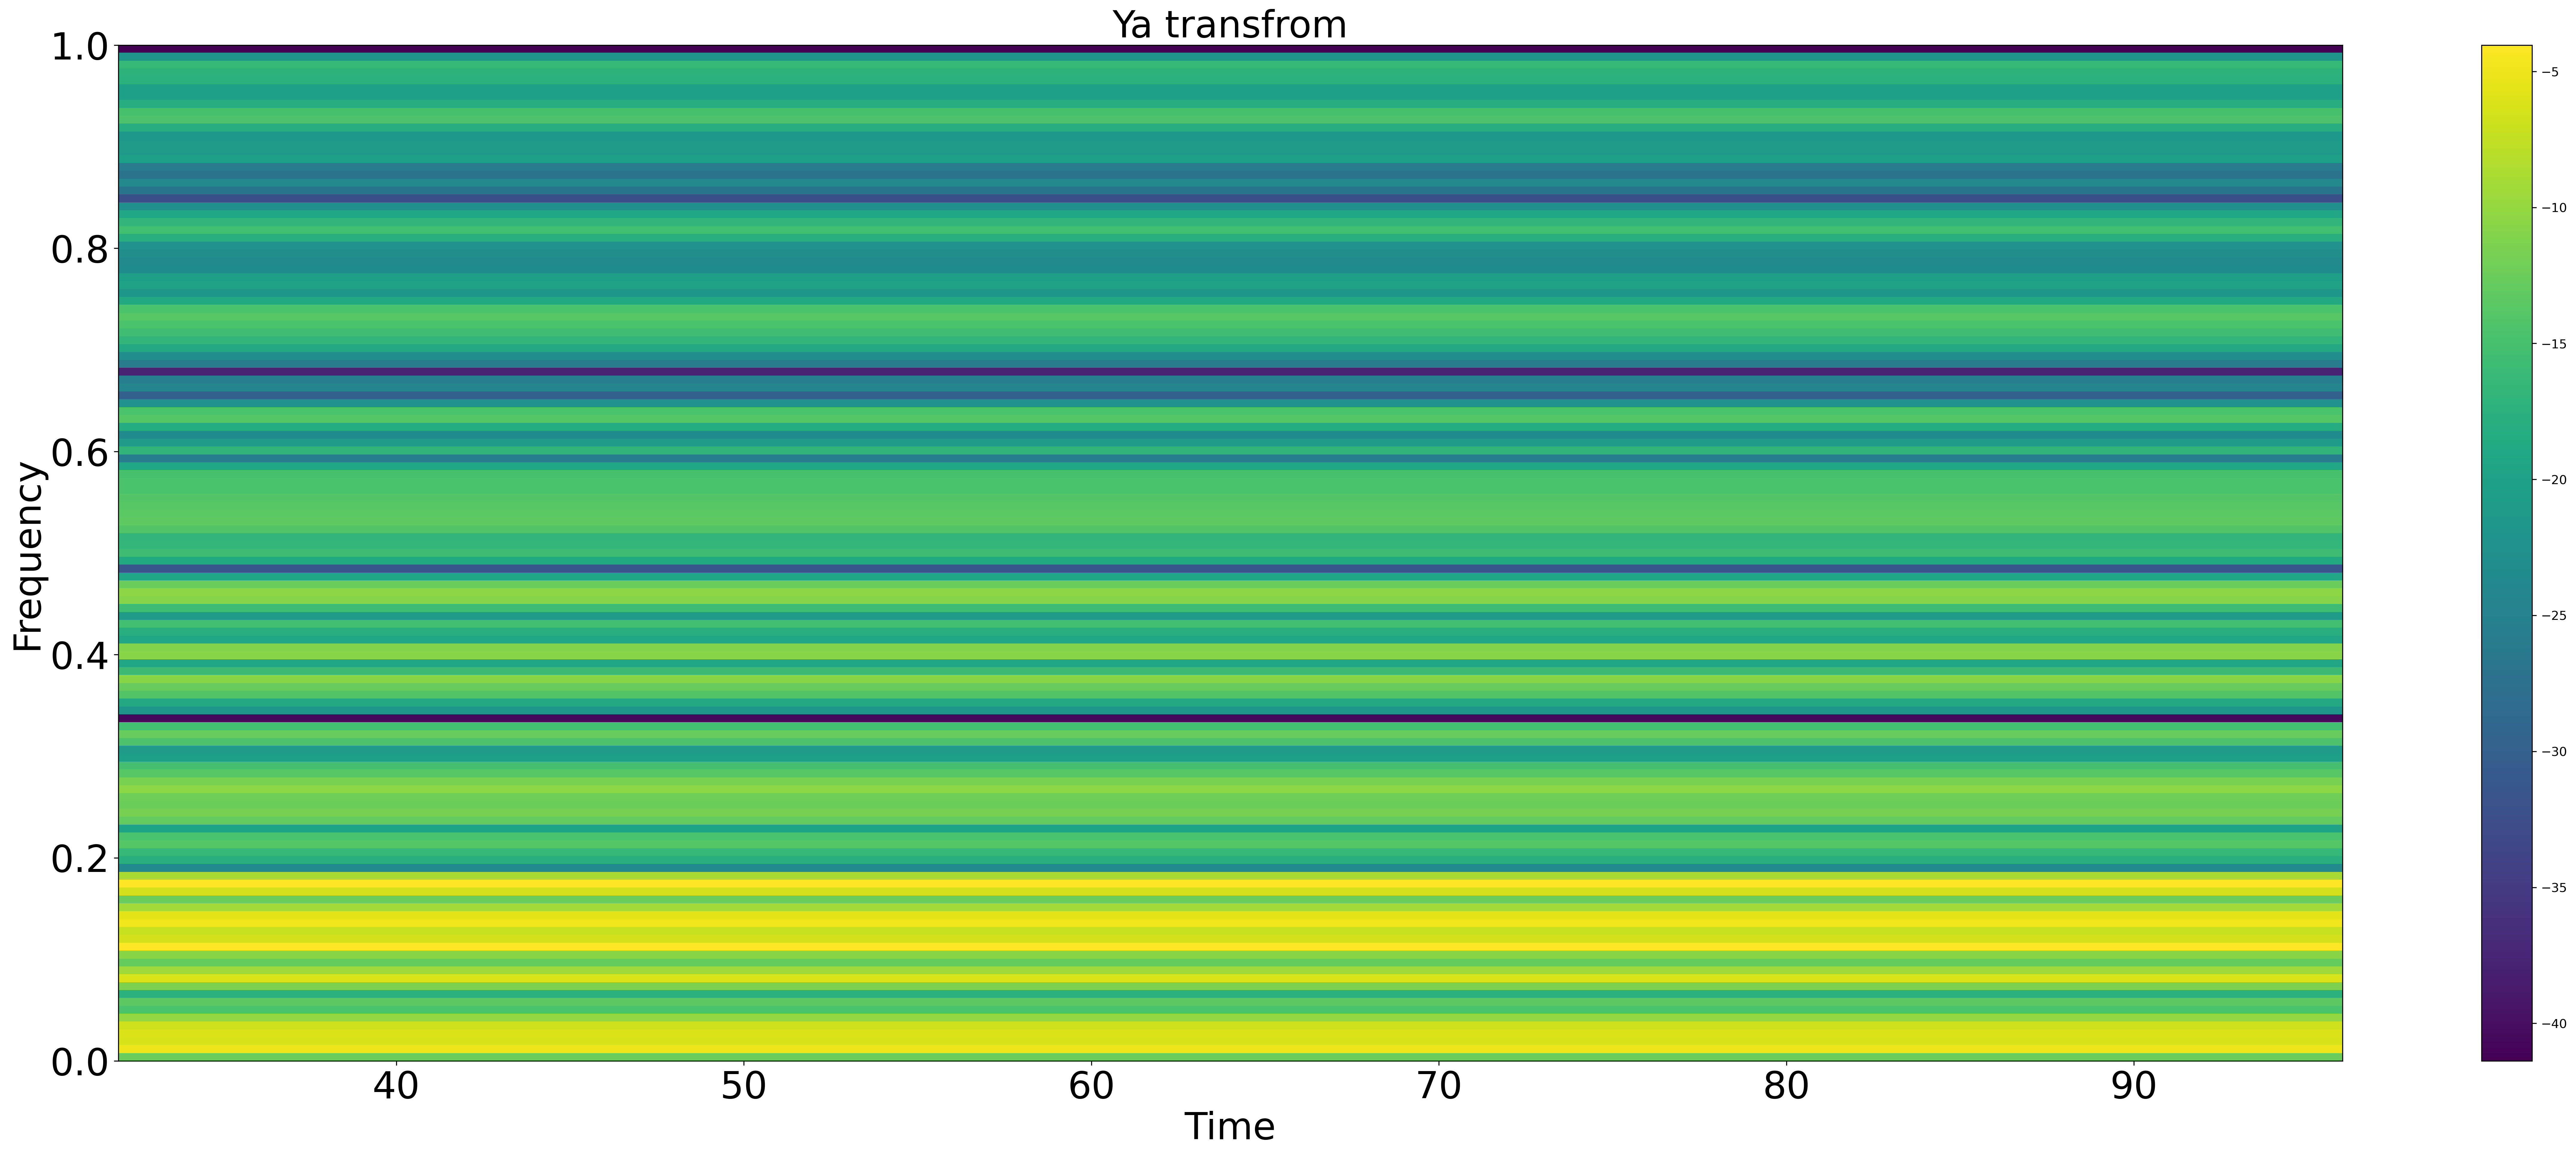

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21434/3517152436.py:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=173).
  plt.specgram(data[:,3])


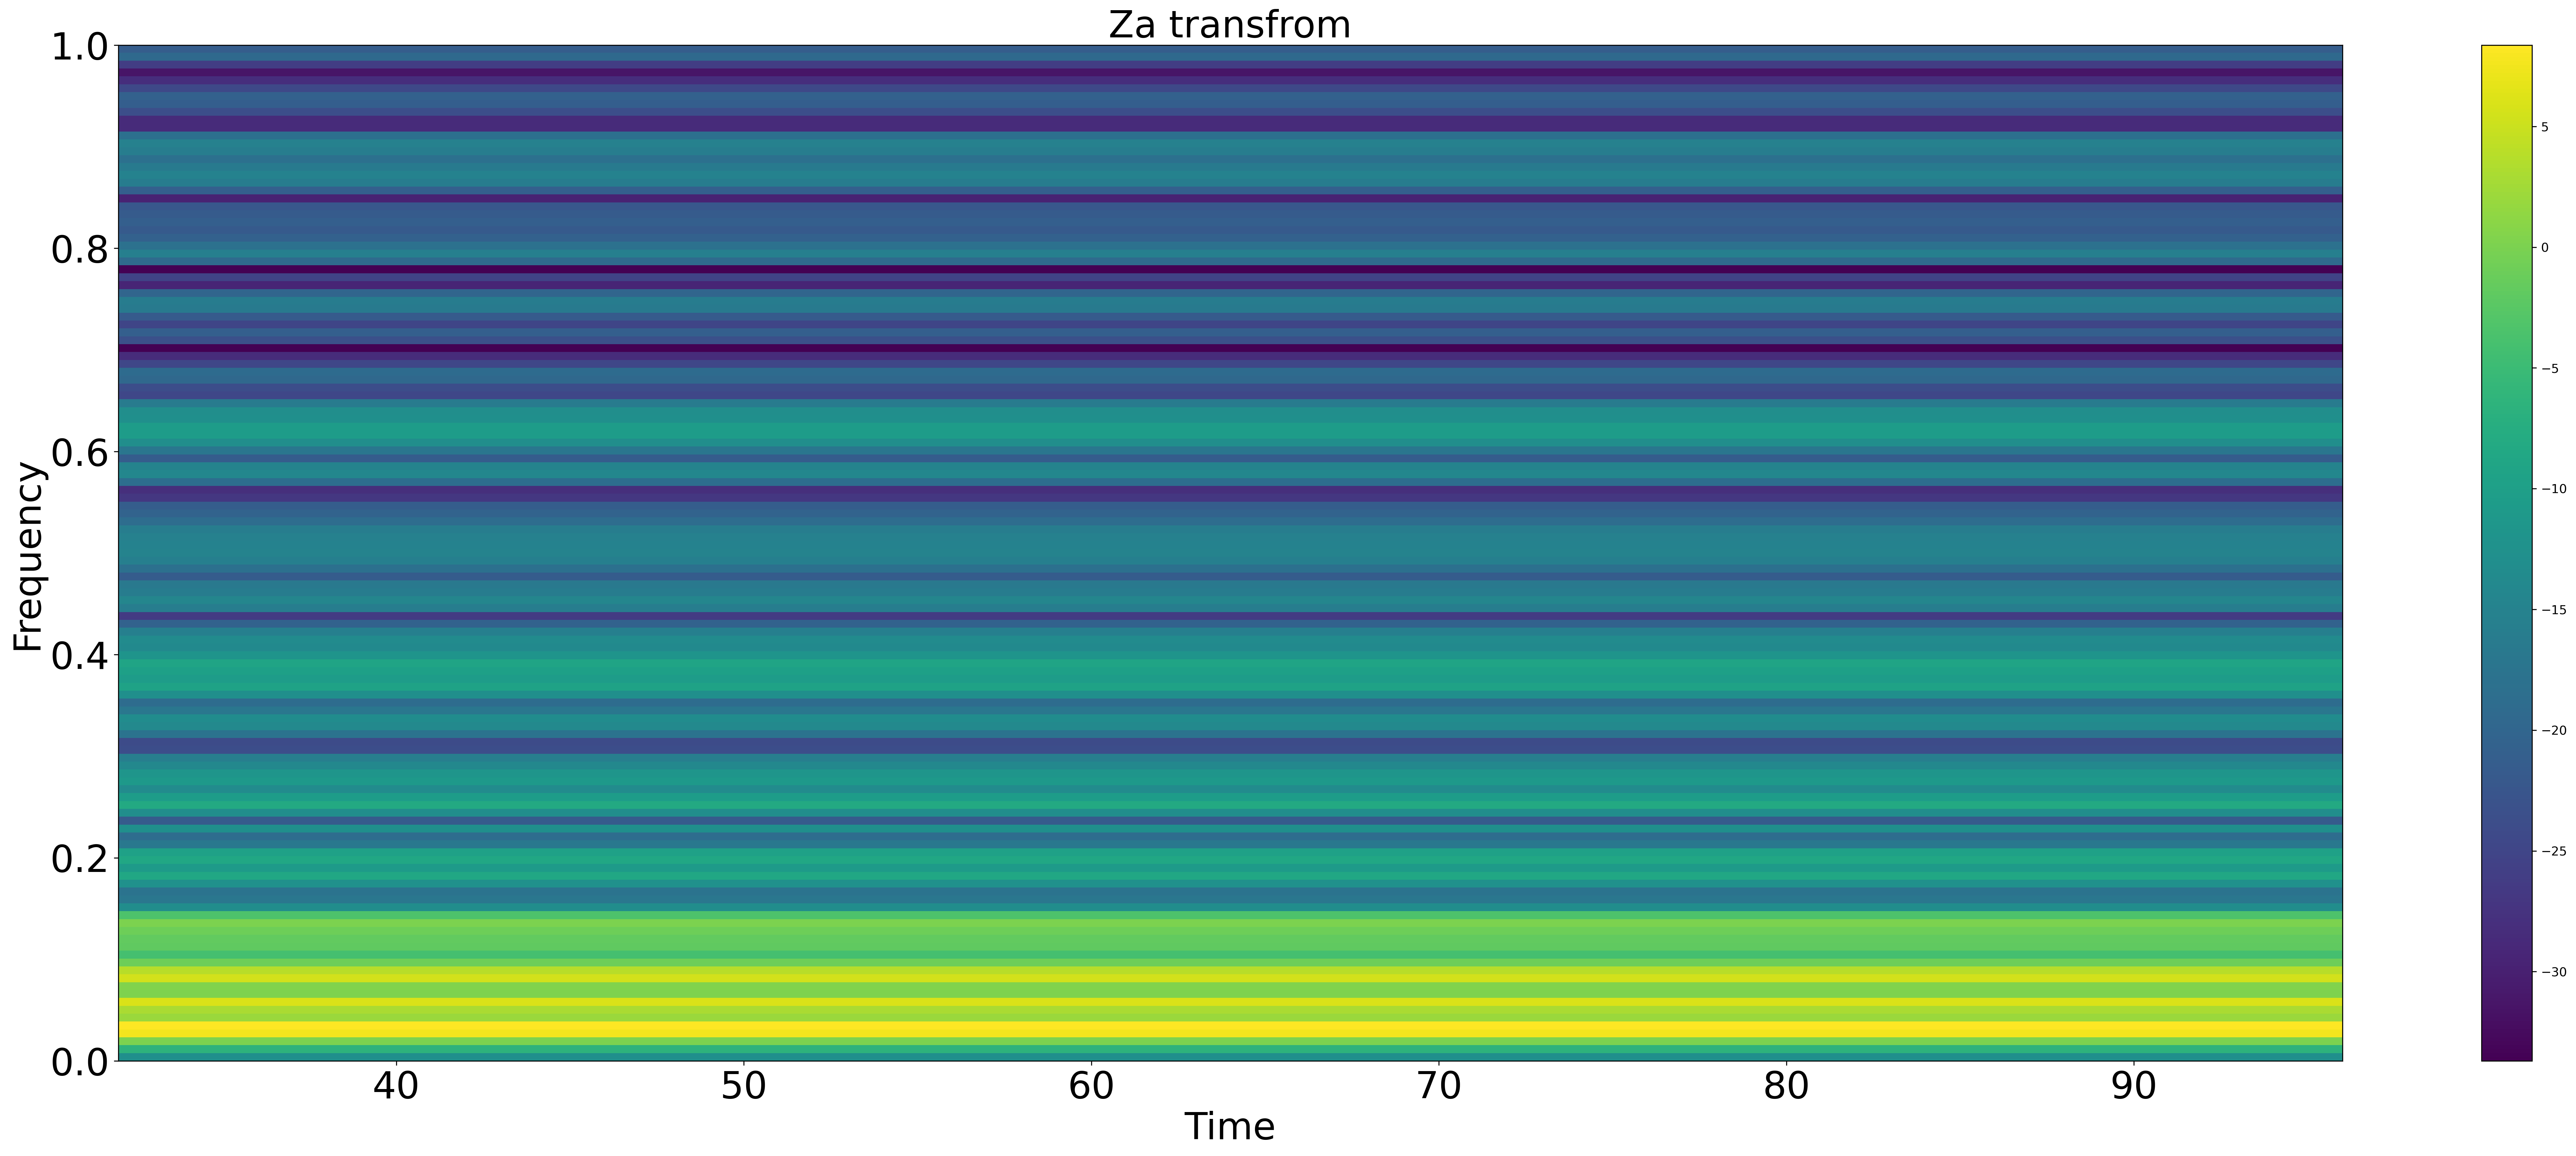

In [6]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3])
plt.colorbar()
plt.show()